In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import poisson
from iminuit import Minuit
from iminuit.cost import LeastSquares

Text(0.5, 0, 'Corrente (mA)')

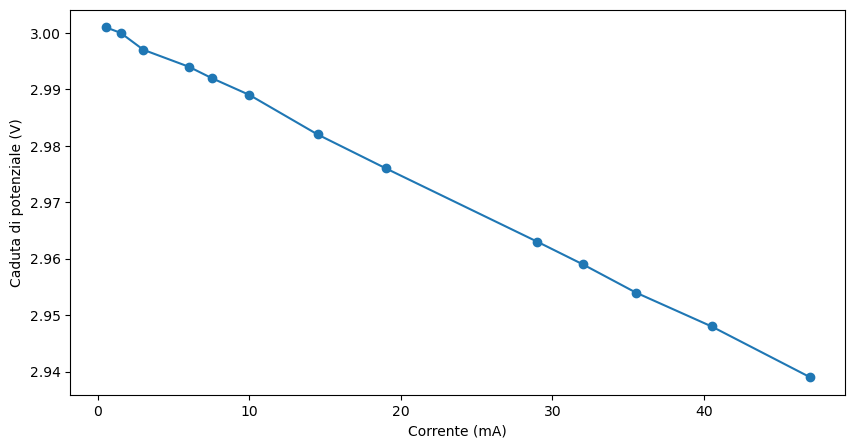

In [42]:
errV = 0.001 #Volt
errI = 0.5 #microAmpere
R = [60000, 70000, 80000, 90000, 100000, 150000, 200000, 300000, 400000, 500000, 1000000, 2000000, 50000000] #Ohm
V = [2.939, 2.948, 2.954, 2.959, 2.963, 2.976, 2.982, 2.989, 2.992, 2.994, 2.997, 3.000, 3.001] #Volt
I = [47.0,40.5, 35.5, 32.0, 29.0, 19.0, 14.5, 10.0, 7.5, 6, 3, 1.5, 0.5] #microAmpere
plt.figure(figsize = (10,5))
plt.plot(I,V)
plt.scatter(I,V)
plt.ylabel("Caduta di potenziale (V)")
plt.xlabel("Corrente (mA)")

In [70]:
def par(V, a, b):
    return V*a + b
least_squares = LeastSquares(V, I, errI, par)
m = Minuit(least_squares, a = 772, b = 2318)
m.migrad()
m.minos()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 3.691 (χ²/ndof = 0.3)      │              Nfcn = 75               │
│ EDM = 5.36e-13 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ a    │   -749    │     7     │     -7     │     7      │         │         │       │
│ 1 │ b    │  2.247e3  │  0.020e3  │  -0.020e3  │  0.020e3   │         │         │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌──────────┬───────────────────────┬───────────────────────┐
│          │           a           │           b           │
├──────────┼───────────┬───────────┼───────────┬───────────┤
│  Error   │    -7     │     7     │    -20    │    20     │
│  Valid   │   True    │   True    │   True    │   True    │
│ At Limit │   False   │   False   │   False   │   False   │
│ Max FCN  │   False   │   False   │   False   │   False   │
│ New Min  │   False   │   False   │   False   │   False   │
└──────────┴───────────┴───────────┴───────────┴───────────┘
┌───┬───────────┐
│   │    a    b │
├───┼───────────┤
│ a │ 45.3 -130 │
│ b │ -130  401 │
└───┴───────────┘

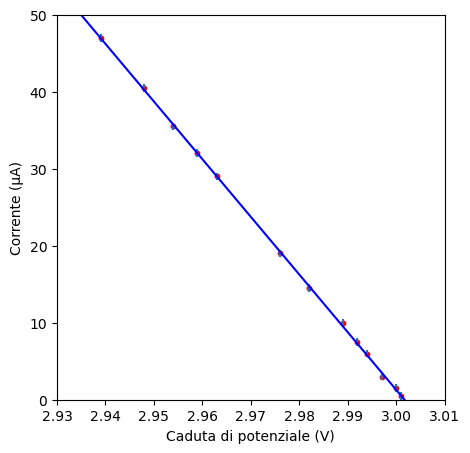

In [64]:
V = [2.939, 2.948, 2.954, 2.959, 2.963, 2.976, 2.982, 2.989, 2.992, 2.994, 2.997, 3.000, 3.001] #Volt
I = [47.0,40.5, 35.5, 32.0, 29.0, 19.0, 14.5, 10.0, 7.5, 6, 3, 1.5, 0.5] #microAmpere
plt.figure(figsize = (5,5))
plt.scatter(V,I, color = 'red', s = 10)
plt.ylabel("Corrente (μA)")
plt.xlabel("Caduta di potenziale (V)")
plt.ylim(0,50)
plt.xlim(2.93,3.01)
plt.errorbar(V, I, yerr=errI, fmt = 'none')
a, b = m.values[0], m.values[1]
p = 2.92
q = 3.02
plt.plot([p,q],[a*p+b,a*q+b], color = 'blue')

In [45]:
m.values

<ValueView a=-0.9128960844778917 b=6.855222546929335>